In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn
from helper import *
from connection import *

In [2]:
from connection import *

con = connect()

Connection Successful


Distribution

In [3]:
query = "progression.sql"
data = SQL(query, con)

In [4]:
#data.to_csv("data/progression_order.csv")

In [5]:
data

,domain_id,root_id,task_type_id,task_level,progression_order,time_implemented
0,1,20,20,1,0,2012-01-01
1,1,20,20,2,1,2012-01-01
2,1,20,20,3,2,2012-01-01
3,1,20,20,4,3,2012-01-01
4,1,20,20,5,4,2012-01-01
...,...,...,...,...,...,...
1170,14,6,6,5,25,2019-10-08
1171,14,29,174,6,26,2019-10-08
1172,14,7,169,6,27,2019-10-08
1173,14,28,173,6,28,2019-10-08


In [6]:
dates = sorted(pd.unique(data["time_implemented"]))
dates

[numpy.datetime64('2012-01-01T00:00:00.000000000'),
 numpy.datetime64('2017-03-20T00:00:00.000000000'),
 numpy.datetime64('2017-04-04T00:00:00.000000000'),
 numpy.datetime64('2017-12-04T00:00:00.000000000'),
 numpy.datetime64('2019-10-08T00:00:00.000000000')]

In [7]:
df = pd.read_csv("data/context_action.csv")
df.drop(df.columns[[0, 1]], axis=1, inplace=True)
df.head()

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,disorder_id,start_time,start_time_min,end_time,end_time_min,deficit_id
0,635715,15666,20,1,3,0.875,1,1y,1964,2,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}"
1,635715,15666,20,1,3,0.875,1,1y,1964,3,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}"
2,695385,15666,20,1,5,0.800,1,1y,1964,2,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}"
3,695385,15666,20,1,5,0.800,1,1y,1964,3,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}"
4,705234,15666,20,1,5,0.850,1,1y,1964,2,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}"


In [8]:
pd.unique(df["domain_id"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [9]:
disorder_ids = df.groupby("patient_id")["disorder_id"].apply(set).reset_index()
disorder_ids

,patient_id,disorder_id
0,14189,{3}
1,14561,{2}
2,14683,"{2, 3}"
3,14685,{2}
4,14696,{2}
...,...,...
97749,415551,{9}
97750,415603,{2}
97751,415758,{2}
97752,415867,{1}


In [10]:
df = df.drop(columns="disorder_id")
df = df.merge(disorder_ids, on="patient_id", how="left")
df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id
0,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
1,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
2,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
3,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
4,705234,15666,20,1,5,0.850,1,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61860705,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860706,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860707,19565141,324494,173,6,1,1.000,14,10y,1947,2019-08-26,2019-08-26 14:17:41,NaN,NaN,{6},{9}
61860708,19782524,325754,188,6,4,0.878,14,1m,1955,2019-09-06,2019-09-06 18:25:21,2019-09-11,2019-09-11 17:11:53,"{3, 4, 5, 6, 7, 8, 9, 10}","{2, 3}"


In [11]:
pd.unique(df["domain_id"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [12]:
df = df.dropna()
df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id
0,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
1,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
2,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
3,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
4,705234,15666,20,1,5,0.850,1,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61860704,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860705,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860706,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860708,19782524,325754,188,6,4,0.878,14,1m,1955,2019-09-06,2019-09-06 18:25:21,2019-09-11,2019-09-11 17:11:53,"{3, 4, 5, 6, 7, 8, 9, 10}","{2, 3}"


In [13]:
pd.unique(df["domain_id"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [14]:
df.dtypes

id                        int64
patient_id                int64
task_type_id              int64
task_level                int64
completed_task_count      int64
accuracy                float64
domain_id                 int64
condition_since          object
birth_year                int64
start_time               object
start_time_min           object
end_time                 object
end_time_min             object
deficit_id               object
disorder_id              object
dtype: object

In [15]:
data.dtypes

domain_id                     int64
root_id                       int64
task_type_id                  int64
task_level                    int64
progression_order             int64
time_implemented     datetime64[ns]
dtype: object

In [16]:
df["end_time"] = pd.to_datetime(df["end_time"])

In [17]:
data.rename(columns={'time_implemented':'end_time'}, inplace=True)


In [18]:
v1_progression = data[data.end_time < pd.to_datetime(dates[1])]
v1_progression

,domain_id,root_id,task_type_id,task_level,progression_order,end_time
0,1,20,20,1,0,2012-01-01
1,1,20,20,2,1,2012-01-01
2,1,20,20,3,2,2012-01-01
3,1,20,20,4,3,2012-01-01
4,1,20,20,5,4,2012-01-01
...,...,...,...,...,...,...
256,14,8,8,5,25,2012-01-01
257,14,29,29,5,26,2012-01-01
258,14,7,7,5,27,2012-01-01
259,14,28,28,5,28,2012-01-01


In [19]:
v1_df = df[df.end_time < pd.to_datetime(dates[1])]
v1_df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id
0,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
1,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
2,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
3,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
4,705234,15666,20,1,5,0.850,1,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61856072,6343016,108029,28,4,2,1.000,14,6m,1970,2017-03-13,2017-03-13 18:57:50,2017-03-13,2017-03-13 18:58:31,{3},{1}
61856081,6371075,108409,28,4,3,1.000,14,1y,2013,2017-03-15,2017-03-15 22:30:56,2017-03-15,2017-03-15 22:31:42,{3},{9999}
61856082,6371075,108409,28,4,3,1.000,14,1y,2013,2017-03-15,2017-03-15 22:30:56,2017-03-15,2017-03-15 22:31:42,{3},{9999}
61856083,6371075,108409,28,4,3,1.000,14,1y,2013,2017-03-15,2017-03-15 22:30:56,2017-03-15,2017-03-15 22:31:42,{3},{9999}


In [20]:
pd.unique(v1_df["domain_id"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [21]:
v1_df = v1_df.merge(v1_progression, left_on=["task_type_id", "task_level", "domain_id"], right_on=["task_type_id", "task_level", "domain_id"])
v1_df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time_x,end_time_min,deficit_id,disorder_id,root_id,progression_order,end_time_y
0,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
1,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
2,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
3,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
4,705234,15666,20,1,5,0.850,1,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18746885,5004080,88528,75,1,2,0.950,8,2y,1986,2016-10-27,2016-10-27 17:44:49,2016-11-02,2016-11-02 00:01:12,{8},{1},75,3,2012-01-01
18746886,5004080,88528,75,1,2,0.950,8,2y,1986,2016-10-27,2016-10-27 17:44:49,2016-11-02,2016-11-02 00:01:12,{8},{1},75,3,2012-01-01
18746887,5966203,99214,75,1,5,0.300,8,1y,1960,2017-02-07,2017-02-07 00:36:40,2017-02-07,2017-02-07 00:40:55,"{1, 2, 3}",{2},75,3,2012-01-01
18746888,5966203,99214,75,1,5,0.300,8,1y,1960,2017-02-07,2017-02-07 00:36:40,2017-02-07,2017-02-07 00:40:55,"{1, 2, 3}",{2},75,3,2012-01-01


In [22]:
len(pd.unique(v1_df["patient_id"]))

20308

In [23]:
v1_df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time_x,end_time_min,deficit_id,disorder_id,root_id,progression_order,end_time_y
0,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
1,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
2,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
3,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
4,705234,15666,20,1,5,0.850,1,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}",20,0,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18746885,5004080,88528,75,1,2,0.950,8,2y,1986,2016-10-27,2016-10-27 17:44:49,2016-11-02,2016-11-02 00:01:12,{8},{1},75,3,2012-01-01
18746886,5004080,88528,75,1,2,0.950,8,2y,1986,2016-10-27,2016-10-27 17:44:49,2016-11-02,2016-11-02 00:01:12,{8},{1},75,3,2012-01-01
18746887,5966203,99214,75,1,5,0.300,8,1y,1960,2017-02-07,2017-02-07 00:36:40,2017-02-07,2017-02-07 00:40:55,"{1, 2, 3}",{2},75,3,2012-01-01
18746888,5966203,99214,75,1,5,0.300,8,1y,1960,2017-02-07,2017-02-07 00:36:40,2017-02-07,2017-02-07 00:40:55,"{1, 2, 3}",{2},75,3,2012-01-01


In [24]:
d = v1_df[v1_df.domain_id == 14]
d = d.drop_duplicates(subset="id")

In [25]:
temp = d.loc[d.groupby("patient_id")["progression_order"].idxmin()]

In [ ]:
temp = d.loc[d.groupby("patient_id")["progression_order"].idxmax()]

In [ ]:
temp = d

<Axes: xlabel='progression_order', ylabel='Count'>

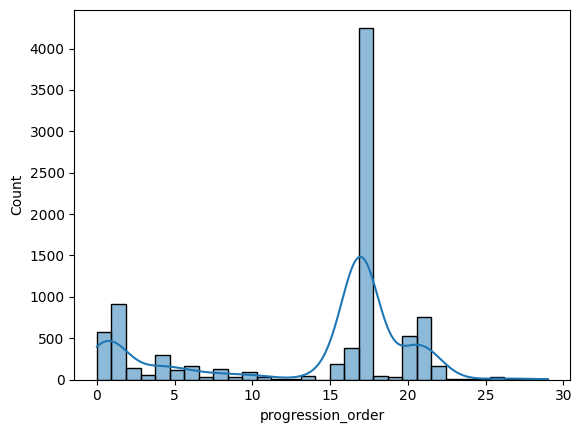

In [26]:
sns.histplot(data=temp, x="progression_order", kde=True)

Patient Case Study

In [30]:
df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,domain_id,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id
0,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
1,635715,15666,20,1,3,0.875,1,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}"
2,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
3,695385,15666,20,1,5,0.800,1,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}"
4,705234,15666,20,1,5,0.850,1,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61860704,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860705,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860706,14002360,217018,28,5,7,0.973,14,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}"
61860708,19782524,325754,188,6,4,0.878,14,1m,1955,2019-09-06,2019-09-06 18:25:21,2019-09-11,2019-09-11 17:11:53,"{3, 4, 5, 6, 7, 8, 9, 10}","{2, 3}"


In [32]:
domain_ids = df.groupby("id")["domain_id"].apply(set).reset_index()
domain_ids

,id,domain_id
0,583031,{14}
1,583032,{14}
2,583033,"{6, 7}"
3,583034,"{6, 7}"
4,583035,{14}
...,...,...
7447334,25300165,{2}
7447335,25300166,{2}
7447336,25300248,{12}
7447337,25300249,{10}


In [33]:
df = df.drop(columns="domain_id")
df = df.merge(domain_ids, on="id", how="left")
df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id,domain_id
0,635715,15666,20,1,3,0.875,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",{1}
1,635715,15666,20,1,3,0.875,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",{1}
2,695385,15666,20,1,5,0.800,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",{1}
3,695385,15666,20,1,5,0.800,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",{1}
4,705234,15666,20,1,5,0.850,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}",{1}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61495331,14002360,217018,28,5,7,0.973,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}",{14}
61495332,14002360,217018,28,5,7,0.973,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}",{14}
61495333,14002360,217018,28,5,7,0.973,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}",{14}
61495334,19782524,325754,188,6,4,0.878,1m,1955,2019-09-06,2019-09-06 18:25:21,2019-09-11,2019-09-11 17:11:53,"{3, 4, 5, 6, 7, 8, 9, 10}","{2, 3}",{14}


In [34]:
df = df.drop_duplicates(subset="id")
df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id,domain_id
0,635715,15666,20,1,3,0.875,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",{1}
2,695385,15666,20,1,5,0.800,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",{1}
4,705234,15666,20,1,5,0.850,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}",{1}
6,4929693,15666,20,1,5,0.800,1y,1964,2016-10-19,2016-10-19 20:47:01,2016-10-19,2016-10-19 20:48:29,"{1, 2, 3, 4, 8}","{2, 3}",{1}
32,5429562,15666,37,1,5,0.800,1y,1964,2016-12-13,2016-12-13 01:14:14,2016-12-13,2016-12-13 01:16:24,"{1, 2, 3, 4, 8}","{2, 3}","{1, 10, 11}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61495284,9099376,144205,29,5,7,0.809,2y,1975,2017-11-17,2017-11-17 15:24:11,2017-11-22,2017-11-22 21:01:34,"{1, 2, 3, 4, 6}","{2, 3}",{14}
61495310,14061511,217018,7,5,10,0.908,6m,1943,2018-11-05,2018-11-05 15:52:25,2018-11-05,2018-11-05 16:08:50,{3},"{3, 6}",{14}
61495312,14062555,217018,7,5,10,0.978,6m,1943,2018-11-05,2018-11-05 16:16:53,2018-11-05,2018-11-05 16:27:40,{3},"{3, 6}",{14}
61495314,14002360,217018,28,5,7,0.973,6m,1943,2018-11-01,2018-11-01 14:40:43,2018-11-01,2018-11-01 14:41:49,{3},"{3, 6}",{14}


In [39]:
typical = df[df['disorder_id'].apply(lambda x: 2 in x)]
typical

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id,domain_id
0,635715,15666,20,1,3,0.875,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",{1}
2,695385,15666,20,1,5,0.800,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",{1}
4,705234,15666,20,1,5,0.850,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}",{1}
6,4929693,15666,20,1,5,0.800,1y,1964,2016-10-19,2016-10-19 20:47:01,2016-10-19,2016-10-19 20:48:29,"{1, 2, 3, 4, 8}","{2, 3}",{1}
32,5429562,15666,37,1,5,0.800,1y,1964,2016-12-13,2016-12-13 01:14:14,2016-12-13,2016-12-13 01:16:24,"{1, 2, 3, 4, 8}","{2, 3}","{1, 10, 11}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61495278,8798733,144205,29,5,10,0.960,2y,1975,2017-10-24,2017-10-24 20:43:46,2017-10-25,2017-10-25 19:15:21,"{1, 2, 3, 4, 6}","{2, 3}",{14}
61495280,8812063,144205,29,5,10,0.849,2y,1975,2017-10-25,2017-10-25 19:17:50,2017-10-25,2017-10-25 19:22:33,"{1, 2, 3, 4, 6}","{2, 3}",{14}
61495282,8824508,144205,29,5,8,0.741,2y,1975,2017-10-26,2017-10-26 17:21:25,2017-10-30,2017-10-30 21:56:03,"{1, 2, 3, 4, 6}","{2, 3}",{14}
61495284,9099376,144205,29,5,7,0.809,2y,1975,2017-11-17,2017-11-17 15:24:11,2017-11-22,2017-11-22 21:01:34,"{1, 2, 3, 4, 6}","{2, 3}",{14}


In [40]:
typical = typical[typical['deficit_id'].apply(lambda x: len(x) > 1)]
typical

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id,domain_id
0,635715,15666,20,1,3,0.875,1y,1964,2014-07-31,2014-07-31 00:38:38,2014-07-31,2014-07-31 00:39:24,"{1, 2, 3, 4, 8}","{2, 3}",{1}
2,695385,15666,20,1,5,0.800,1y,1964,2014-08-18,2014-08-18 22:03:20,2014-08-18,2014-08-18 22:05:21,"{1, 2, 3, 4, 8}","{2, 3}",{1}
4,705234,15666,20,1,5,0.850,1y,1964,2014-08-21,2014-08-21 17:51:23,2014-08-21,2014-08-21 17:52:40,"{1, 2, 3, 4, 8}","{2, 3}",{1}
6,4929693,15666,20,1,5,0.800,1y,1964,2016-10-19,2016-10-19 20:47:01,2016-10-19,2016-10-19 20:48:29,"{1, 2, 3, 4, 8}","{2, 3}",{1}
32,5429562,15666,37,1,5,0.800,1y,1964,2016-12-13,2016-12-13 01:14:14,2016-12-13,2016-12-13 01:16:24,"{1, 2, 3, 4, 8}","{2, 3}","{1, 10, 11}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61495278,8798733,144205,29,5,10,0.960,2y,1975,2017-10-24,2017-10-24 20:43:46,2017-10-25,2017-10-25 19:15:21,"{1, 2, 3, 4, 6}","{2, 3}",{14}
61495280,8812063,144205,29,5,10,0.849,2y,1975,2017-10-25,2017-10-25 19:17:50,2017-10-25,2017-10-25 19:22:33,"{1, 2, 3, 4, 6}","{2, 3}",{14}
61495282,8824508,144205,29,5,8,0.741,2y,1975,2017-10-26,2017-10-26 17:21:25,2017-10-30,2017-10-30 21:56:03,"{1, 2, 3, 4, 6}","{2, 3}",{14}
61495284,9099376,144205,29,5,7,0.809,2y,1975,2017-11-17,2017-11-17 15:24:11,2017-11-22,2017-11-22 21:01:34,"{1, 2, 3, 4, 6}","{2, 3}",{14}


In [41]:
typical = typical[typical['birth_year'].apply(lambda x: 2023-x == 60)]
typical

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id,domain_id
826497,1377354,32196,20,1,5,0.725,6m,1963,2015-02-13,2015-02-13 21:15:40,2015-02-13,2015-02-13 21:17:07,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",{1}
826499,1388914,32196,20,1,5,0.000,6m,1963,2015-02-17,2015-02-17 05:10:55,2015-02-17,2015-02-17 05:11:31,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",{1}
826501,1392570,32196,20,1,5,0.000,6m,1963,2015-02-17,2015-02-17 22:03:45,2015-02-17,2015-02-17 22:03:57,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",{1}
826503,1396131,32196,20,1,5,0.825,6m,1963,2015-02-18,2015-02-18 19:21:40,2015-02-18,2015-02-18 19:23:23,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",{1}
826505,1397298,32196,20,1,5,0.900,6m,1963,2015-02-18,2015-02-18 22:42:24,2015-02-18,2015-02-18 22:44:00,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",{1}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61490294,12395151,197416,28,4,8,0.925,6m,1963,2018-07-21,2018-07-21 00:03:48,2018-07-26,2018-07-26 12:01:16,"{2, 3}",{2},{14}
61491168,13805084,218892,29,4,1,0.000,1y,1963,2018-10-19,2018-10-19 20:21:08,2018-10-19,2018-10-19 20:21:18,"{1, 2, 3, 4, 7, 8}","{1, 2, 3}",{14}
61491592,6494314,109544,28,4,3,0.633,6m,1963,2017-03-27,2017-03-27 22:59:08,2017-03-27,2017-03-27 23:01:41,{3},"{2, 3}",{14}
61493895,13117348,208323,28,4,3,0.977,5y,1963,2018-09-06,2018-09-06 23:51:25,2018-09-06,2018-09-06 23:52:32,{3},{2},{14}


In [44]:
typical.groupby("patient_id").size().mean()

93.44550898203593

In [67]:
temp = typical.groupby("patient_id").size()
temp[temp > 88]

patient_id
17287      108
32196     1408
32379      340
32943      160
34311     1038
          ... 
329147     348
330878      99
332588     199
336374     122
345656     104
Length: 106, dtype: int64

In [46]:
p = typical[typical["patient_id"] == 17777]
p

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id,domain_id
11083000,707016,17777,20,2,3,1.000,5y,1963,2014-08-22,2014-08-22 03:48:40,2014-08-22,2014-08-22 03:51:15,"{8, 5, 6, 7}","{2, 3}",{1}
11083002,712086,17777,20,2,3,0.933,5y,1963,2014-08-24,2014-08-24 04:18:51,2014-08-24,2014-08-24 04:19:52,"{8, 5, 6, 7}","{2, 3}",{1}
11083004,714201,17777,20,2,7,0.943,5y,1963,2014-08-25,2014-08-25 05:09:50,2014-08-25,2014-08-25 05:12:36,"{8, 5, 6, 7}","{2, 3}",{1}
11083006,717423,17777,20,2,6,0.983,5y,1963,2014-08-26,2014-08-26 02:28:54,2014-08-31,2014-08-31 02:16:37,"{8, 5, 6, 7}","{2, 3}",{1}
11083032,748075,17777,20,4,5,0.958,5y,1963,2014-09-05,2014-09-05 03:35:16,2014-09-05,2014-09-05 03:36:59,"{8, 5, 6, 7}","{2, 3}",{1}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083830,712090,17777,6,3,3,0.667,5y,1963,2014-08-24,2014-08-24 04:24:46,2014-08-24,2014-08-24 04:26:10,"{8, 5, 6, 7}","{2, 3}",{14}
11083832,714210,17777,6,3,7,0.571,5y,1963,2014-08-25,2014-08-25 05:27:49,2014-08-25,2014-08-25 05:29:43,"{8, 5, 6, 7}","{2, 3}",{14}
11083834,717432,17777,6,3,7,0.563,5y,1963,2014-08-26,2014-08-26 02:52:51,2014-08-26,2014-08-26 02:54:29,"{8, 5, 6, 7}","{2, 3}",{14}
11083836,748086,17777,6,3,5,0.786,5y,1963,2014-09-05,2014-09-05 04:03:36,2014-09-11,2014-09-11 22:36:22,"{8, 5, 6, 7}","{2, 3}",{14}


<Axes: >

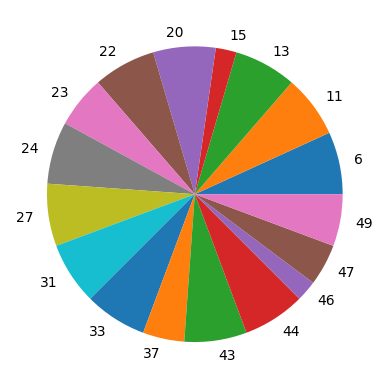

In [47]:
p.groupby("task_type_id").size().plot.pie()

<Axes: >

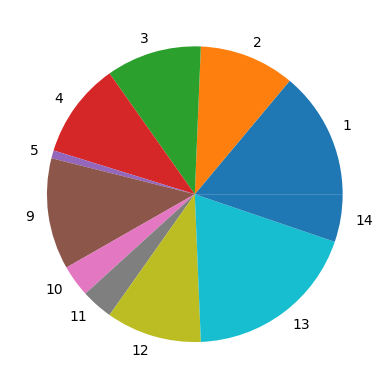

In [50]:
temp = p.explode("domain_id")
temp.groupby("domain_id").size().plot.pie()

In [53]:
pd.unique(p["start_time"])

array(['2014-08-22', '2014-08-24', '2014-08-25', '2014-08-26',
       '2014-09-05', '2014-10-04'], dtype=object)

In [54]:
p.groupby("start_time").size()

start_time
2014-08-22    16
2014-08-24    16
2014-08-25    15
2014-08-26    15
2014-09-05    14
2014-10-04    12
dtype: int64

In [82]:
p = typical[typical["patient_id"] == 336374]
p

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time,end_time_min,deficit_id,disorder_id,domain_id
61036108,20461814,336374,178,3,5,1.00,1m,1963,2019-10-13,2019-10-13 00:46:07,2019-10-13,2019-10-13 00:46:38,"{2, 3}",{2},{4}
61036109,20472363,336374,178,3,5,1.00,1m,1963,2019-10-13,2019-10-13 22:27:47,2019-10-13,2019-10-13 22:28:18,"{2, 3}",{2},{4}
61036110,20517990,336374,178,3,10,1.00,1m,1963,2019-10-15,2019-10-15 23:58:40,2019-10-15,2019-10-15 23:59:46,"{2, 3}",{2},{4}
61036111,20523773,336374,73,2,5,0.85,1m,1963,2019-10-16,2019-10-16 13:51:31,2019-10-16,2019-10-16 13:53:29,"{2, 3}",{2},"{4, 5}"
61036112,20541511,336374,73,2,5,1.00,1m,1963,2019-10-17,2019-10-17 00:05:08,2019-10-17,2019-10-17 00:06:06,"{2, 3}",{2},"{4, 5}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61036398,20596269,336374,34,1,5,1.00,1m,1963,2019-10-19,2019-10-19 22:45:30,2019-10-19,2019-10-19 22:45:56,"{2, 3}",{2},"{10, 11}"
61036402,20609847,336374,35,1,5,1.00,1m,1963,2019-10-21,2019-10-21 01:58:40,2019-10-21,2019-10-21 01:59:08,"{2, 3}",{2},"{10, 11}"
61036403,20633336,336374,35,1,5,1.00,1m,1963,2019-10-22,2019-10-22 00:04:45,2019-10-22,2019-10-22 00:05:10,"{2, 3}",{2},"{10, 11}"
61036404,20655810,336374,35,1,5,0.85,1m,1963,2019-10-22,2019-10-22 23:36:12,2019-10-22,2019-10-22 23:36:55,"{2, 3}",{2},"{10, 11}"


<Axes: >

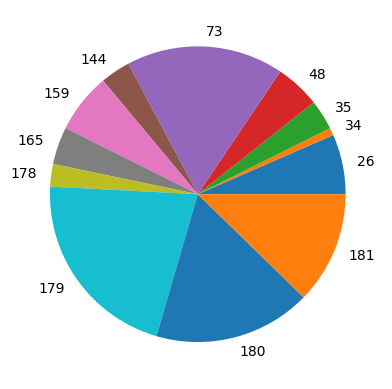

In [83]:
p.groupby("task_type_id").size().plot.pie()

<Axes: >

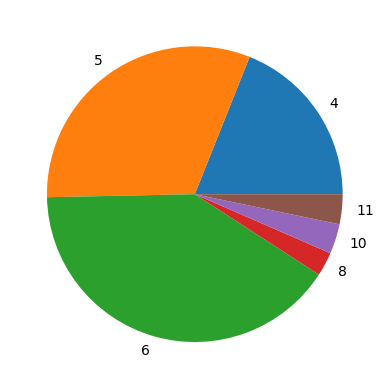

In [84]:
temp = p.explode("domain_id")
temp.groupby("domain_id").size().plot.pie()

In [85]:
p.groupby("start_time").size()

start_time
2019-10-08     1
2019-10-09     2
2019-10-10     1
2019-10-12     2
2019-10-13     5
2019-10-15     4
2019-10-16     3
2019-10-17     8
2019-10-18     2
2019-10-19     7
2019-10-21     7
2019-10-22    14
2019-10-24     8
2019-10-25     8
2019-10-27    10
2019-10-28     1
2019-10-29     4
2019-10-30     3
2019-10-31     7
2019-11-02     5
2019-11-05     6
2019-11-06     3
2019-11-07     3
2019-11-08     1
2019-11-13     3
2019-11-21     4
dtype: int64

In [ ]:
len(pd.unique(p["start_time"]))

26

2023-06-28 11:29:39,076| ERROR   | Could not establish connection from local ('192.168.1.81', 62769) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
2023-06-28 11:29:39,081| ERROR   | Could not establish connection from local ('192.168.1.81', 62769) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
2023-06-28 11:29:39,084| ERROR   | Could not establish connection from local ('192.168.1.81', 62769) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
2023-06-28 11:29:39,086| ERROR   | Could not establish connection from local ('192.168.1.81', 62769) to remote ('ctprod.cktdvwrzgusc.us-east-1.rds.amazonaws.com', 3306) side of the tunnel: open new channel ssh error: SSH session not active
Bad pipe message: %s [b"\x80'Hk0Nl\xd2\x

In [81]:
p.groupby("task_type_id").size().min()

3

Older Methods

In [ ]:
p = df[df["patient_id"] == 45118]
p = p.drop_duplicates(subset="id")
p

In [ ]:
p.nunique()

In [ ]:
progression = SQL("select * from constant_therapy.task_progression where time_implemented = '2012-01-01 00:00:00';", con)
progression

In [ ]:
p = p.merge(progression, how="left")
p

In [ ]:
p = p.loc[p.groupby("domain_id")["progression_order"].idxmin()]

In [ ]:
p[["domain_id", "progression_order"]]

In [ ]:
sns.barplot(data=p[["domain_id", "progression_order"]], x="domain_id", y="progression_order", )

In [ ]:
sns.barplot(data=p[["domain_id", "progression_order"]], x="domain_id", y="progression_order", )

In [ ]:
disorder3 = df[df["disorder_id"] == 3]
disorder9 = df[df["disorder_id"] == 9]

In [ ]:
df.dtypes

In [ ]:
df = df.sort_values(by="start_time_min")

In [ ]:
df["patient_id"]

In [ ]:
p1 = df[df["patient_id"] == 14189]

In [ ]:
p1.groupby("task_type_id").size().plot.pie()

In [ ]:
t1 = p1[p1["task_type_id"] == 37]

In [ ]:
t1 = t1.drop_duplicates(subset="id")

In [ ]:
t1

In [ ]:
sns.lineplot(data=t1, x="start_time", y="accuracy")

In [ ]:
sns.lineplot(data=t1, x="start_time", y="task_level")

In [ ]:
patient_groupby = df.drop_duplicates(subset="id").groupby("patient_id")
patient_groupby.head()

In [ ]:
disorder3_groupby = disorder3.drop_duplicates(subset="id").groupby("patient_id")
disorder3_groupby.head()

In [ ]:
disorder3_groupby.groups.keys()

In [ ]:
p = disorder3[disorder3["patient_id"] == 14683]
p

In [ ]:
pd.unique(p["task_type_id"])

In [ ]:
p[p["task_type_id"] == 20]

In [ ]:
sns.lineplot(data=p[p["task_type_id"] == 20], x="start_time", y="task_level")

In [ ]:
sns.lineplot(data=p[p["task_type_id"] == 30], x="start_time", y="task_level")

In [ ]:
d = p[p["task_type_id"] == 30]
sns.lineplot(data=d[d["task_level"] == 2], x="start_time", y="accuracy")

In [ ]:
sns.lineplot(data=d[d["task_level"] == 4], x="start_time", y="accuracy")

In [ ]:
sns.lineplot(data=d[d["task_level"] == 5], x="start_time", y="accuracy")

In [ ]:
d = p[p["task_type_id"] == 27]

In [ ]:
sns.lineplot(data=d, x="start_time", y="task_level")

In [ ]:
sns.lineplot(data=d[d["task_level"] == 3], x="start_time", y="accuracy")

In [ ]:
sns.lineplot(data=d[d["task_level"] == 4], x="start_time", y="accuracy")

In [ ]:
disorder9_groupby = disorder9.drop_duplicates(subset="id").groupby("patient_id")
disorder9_groupby.head()

In [ ]:
disorder9_groupby.groups.keys()

In [ ]:
disorder9 = disorder9.drop_duplicates(subset="id")
p = disorder9[disorder9["patient_id"] == 90772]
p

In [ ]:
pd.unique(p["task_type_id"])

In [ ]:
d = p[p["task_type_id"] == 27]
d

In [ ]:
sns.lineplot(data=d, x="start_time", y="task_level")

In [ ]:
d = p[p["task_type_id"] == 73]
d

In [ ]:
sns.lineplot(data=d, x="start_time", y="task_level")